In [1]:
## All basic imports 
import pyforest 

In [2]:
## ignore warnings
import warnings
warnings.filterwarnings('ignore')

In [3]:
## reading the data 
data = pd.read_csv("AAPL.csv")

<IPython.core.display.Javascript object>

In [4]:
data.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,03-01-2012,58.485714,58.928570,58.428570,58.747143,50.765709,75555200
1,04-01-2012,58.571430,59.240002,58.468571,59.062859,51.038536,65005500
2,05-01-2012,59.278572,59.792858,58.952858,59.718571,51.605175,67817400
3,06-01-2012,59.967144,60.392857,59.888573,60.342857,52.144630,79573200
4,09-01-2012,60.785713,61.107143,60.192856,60.247143,52.061932,98506100


In [5]:
## lite exploration 
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2011 entries, 0 to 2010
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       2011 non-null   object 
 1   Open       2011 non-null   float64
 2   High       2011 non-null   float64
 3   Low        2011 non-null   float64
 4   Close      2011 non-null   float64
 5   Adj Close  2011 non-null   float64
 6   Volume     2011 non-null   int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 110.1+ KB


In [6]:
data['Date'] = pd.to_datetime(data['Date'], format="%d-%m-%Y")

<IPython.core.display.Javascript object>

In [7]:
data

,Date,Open,High,Low,Close,Adj Close,Volume
0,2012-01-03,58.485714,58.928570,58.428570,58.747143,50.765709,75555200
1,2012-01-04,58.571430,59.240002,58.468571,59.062859,51.038536,65005500
2,2012-01-05,59.278572,59.792858,58.952858,59.718571,51.605175,67817400
3,2012-01-06,59.967144,60.392857,59.888573,60.342857,52.144630,79573200
4,2012-01-09,60.785713,61.107143,60.192856,60.247143,52.061932,98506100
...,...,...,...,...,...,...,...
2006,2019-12-23,280.529999,284.250000,280.369995,284.000000,282.054138,24643000
2007,2019-12-24,284.690002,284.890015,282.920013,284.269989,282.322266,12119700
2008,2019-12-26,284.820007,289.980011,284.700012,289.910004,287.923645,23280300
2009,2019-12-27,291.119995,293.970001,288.119995,289.799988,287.814392,36566500


In [8]:
data= data.set_index('Date')


In [9]:
data

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2012-01-03,58.485714,58.928570,58.428570,58.747143,50.765709,75555200
2012-01-04,58.571430,59.240002,58.468571,59.062859,51.038536,65005500
2012-01-05,59.278572,59.792858,58.952858,59.718571,51.605175,67817400
2012-01-06,59.967144,60.392857,59.888573,60.342857,52.144630,79573200
2012-01-09,60.785713,61.107143,60.192856,60.247143,52.061932,98506100
...,...,...,...,...,...,...
2019-12-23,280.529999,284.250000,280.369995,284.000000,282.054138,24643000
2019-12-24,284.690002,284.890015,282.920013,284.269989,282.322266,12119700
2019-12-26,284.820007,289.980011,284.700012,289.910004,287.923645,23280300


### The dataset consists of the apple stocks from Jan 2012 to Dec 2019. Let us take a look at what each column means

### 1. Date:
Stock Market is open for 5 days, from Monday to Friday. It remains closed on the weekend and public holidays. So the data that we have only comprises of the days when the stock market was open.

### 2. Open:
It gives the apple stock price when the day has just began i.e. when the market has just opened. The Market opens at 9:15 in India.

### 3. High:
It gives the apple stock price when it is at its highest. Stock prices are volatile and vary throughout the day.

### 4. Close:
It gives the apple stock price when the day is over i.e. when the market is closing. The Market closes at 3:30 in India.

### 5. Low:
It gives the apple stock price when it is at its lowest. Stock prices are volatile and vary throughout the day.

### 6. Adjusted Close:
Adjusted close is the closing price after adjustments for all applicable splits and dividend distributions.

### 7. Volume:
Volume is an indicator that means the total number of shares that have been bought or sold in a specific period of time or during the trading day.

In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2011 entries, 2012-01-03 to 2019-12-30
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       2011 non-null   float64
 1   High       2011 non-null   float64
 2   Low        2011 non-null   float64
 3   Close      2011 non-null   float64
 4   Adj Close  2011 non-null   float64
 5   Volume     2011 non-null   int64  
dtypes: float64(5), int64(1)
memory usage: 110.0 KB


In [11]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Open,2011.0,1.267075e+02,5.048375e+01,5.542429e+01,8.588286e+01,1.130500e+02,1.651900e+02,2.911200e+02
High,2011.0,1.278276e+02,5.092630e+01,5.708571e+01,8.671786e+01,1.141900e+02,1.674100e+02,2.939700e+02
Low,2011.0,1.255803e+02,5.012494e+01,5.501429e+01,8.505643e+01,1.118700e+02,1.634250e+02,2.881200e+02
Close,2011.0,1.267412e+02,5.057837e+01,5.579000e+01,8.620214e+01,1.130500e+02,1.652450e+02,2.915200e+02
Adj Close,2011.0,1.195055e+02,5.243844e+01,4.892193e+01,7.505668e+01,1.052229e+02,1.600471e+02,2.895226e+02
Volume,2011.0,5.949670e+07,4.683856e+07,1.136200e+07,2.758565e+07,4.346900e+07,7.471030e+07,3.765300e+08


In [12]:
# checking duplicated values 
data.duplicated().sum()

0

In [13]:
# Check for missing value
data.isnull().sum()

Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

In [14]:
## checking the correlation 
data.corr()

,Open,High,Low,Close,Adj Close,Volume
Open,1.000000,0.999782,0.999718,0.999496,0.998895,-0.557956
High,0.999782,1.000000,0.999657,0.999748,0.999171,-0.554909
Low,0.999718,0.999657,1.000000,0.999769,0.999179,-0.563426
Close,0.999496,0.999748,0.999769,1.000000,0.999402,-0.559654
Adj Close,0.998895,0.999171,0.999179,0.999402,1.000000,-0.566332
Volume,-0.557956,-0.554909,-0.563426,-0.559654,-0.566332,1.000000


## Data Visualization

<IPython.core.display.Javascript object>

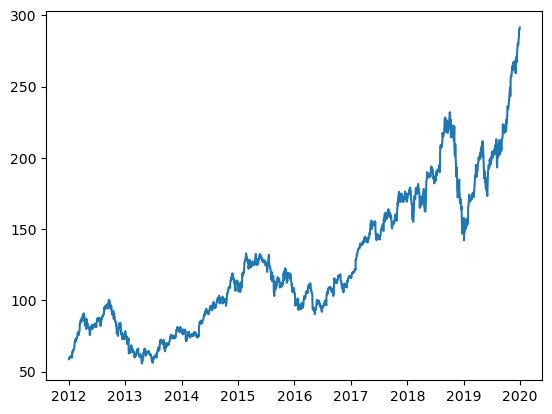

In [15]:
plt.plot(data['Close'])


In [16]:
import datetime


# Define the start and end dates
start_date=datetime.date(2012,1,2)
end_date=datetime.date(2019,12,30)

# Calculate the number of days between start and end date
delta = end_date - start_date
print("Total Days:",delta)

# Initialize counters for market close days and market open days
market_close_days= 0
market_open_days = 0


# Loop through each day in the date range
for i in range(delta.days + 1):
    current_date = start_date+datetime.timedelta(days=i)
    
    
# Check if the current day is a weekend (saturday or sunday)    
    if current_date.weekday()>=5:
         continue 
            
            
    market_open_days += 1
    
print("Market open days:",market_open_days)

Total Days: 2919 days, 0:00:00
Market open days: 2086


In [17]:
data.head(20)

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2012-01-03,58.485714,58.928570,58.428570,58.747143,50.765709,75555200
2012-01-04,58.571430,59.240002,58.468571,59.062859,51.038536,65005500
2012-01-05,59.278572,59.792858,58.952858,59.718571,51.605175,67817400
2012-01-06,59.967144,60.392857,59.888573,60.342857,52.144630,79573200
2012-01-09,60.785713,61.107143,60.192856,60.247143,52.061932,98506100
2012-01-10,60.844284,60.857143,60.214287,60.462856,52.248333,64549100
2012-01-11,60.382858,60.407143,59.901428,60.364285,52.163139,53771200
2012-01-12,60.325714,60.414288,59.821430,60.198570,52.019955,53146800
2012-01-13,59.957142,60.064285,59.808571,59.972858,51.824898,56505400


We have total days 2919     #(2919-2086===833)......That means 833 days market is closed

market open days are 2086 days  # market open only 5 days in week

we have record of 2011 days   #(2086-2011=75)......that means we have 75 missing values

If we add market close days and missing values days we get total record of missing days # (833+75 = 908).......
We conclude that we have missing velues/records of 908 Days.

    

In [18]:
data

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2012-01-03,58.485714,58.928570,58.428570,58.747143,50.765709,75555200
2012-01-04,58.571430,59.240002,58.468571,59.062859,51.038536,65005500
2012-01-05,59.278572,59.792858,58.952858,59.718571,51.605175,67817400
2012-01-06,59.967144,60.392857,59.888573,60.342857,52.144630,79573200
2012-01-09,60.785713,61.107143,60.192856,60.247143,52.061932,98506100
...,...,...,...,...,...,...
2019-12-23,280.529999,284.250000,280.369995,284.000000,282.054138,24643000
2019-12-24,284.690002,284.890015,282.920013,284.269989,282.322266,12119700
2019-12-26,284.820007,289.980011,284.700012,289.910004,287.923645,23280300


In [19]:
data

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2012-01-03,58.485714,58.928570,58.428570,58.747143,50.765709,75555200
2012-01-04,58.571430,59.240002,58.468571,59.062859,51.038536,65005500
2012-01-05,59.278572,59.792858,58.952858,59.718571,51.605175,67817400
2012-01-06,59.967144,60.392857,59.888573,60.342857,52.144630,79573200
2012-01-09,60.785713,61.107143,60.192856,60.247143,52.061932,98506100
...,...,...,...,...,...,...
2019-12-23,280.529999,284.250000,280.369995,284.000000,282.054138,24643000
2019-12-24,284.690002,284.890015,282.920013,284.269989,282.322266,12119700
2019-12-26,284.820007,289.980011,284.700012,289.910004,287.923645,23280300


In [20]:
# Interpolate the missing values

data = data.interpolate(method='linear')

# Reset the index
data= data.reset_index()
# Print the DataFrame with missing values interpolated
print(data)

           Date        Open        High         Low       Close   Adj Close  \
0    2012-01-03   58.485714   58.928570   58.428570   58.747143   50.765709   
1    2012-01-04   58.571430   59.240002   58.468571   59.062859   51.038536   
2    2012-01-05   59.278572   59.792858   58.952858   59.718571   51.605175   
3    2012-01-06   59.967144   60.392857   59.888573   60.342857   52.144630   
4    2012-01-09   60.785713   61.107143   60.192856   60.247143   52.061932   
...         ...         ...         ...         ...         ...         ...   
2006 2019-12-23  280.529999  284.250000  280.369995  284.000000  282.054138   
2007 2019-12-24  284.690002  284.890015  282.920013  284.269989  282.322266   
2008 2019-12-26  284.820007  289.980011  284.700012  289.910004  287.923645   
2009 2019-12-27  291.119995  293.970001  288.119995  289.799988  287.814392   
2010 2019-12-30  289.459991  292.690002  285.220001  291.519989  289.522614   

        Volume  
0     75555200  
1     65005500  


In [21]:
data.shape

(2011, 7)

In [22]:
data.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2012-01-03,58.485714,58.928570,58.428570,58.747143,50.765709,75555200
1,2012-01-04,58.571430,59.240002,58.468571,59.062859,51.038536,65005500
2,2012-01-05,59.278572,59.792858,58.952858,59.718571,51.605175,67817400
3,2012-01-06,59.967144,60.392857,59.888573,60.342857,52.144630,79573200
4,2012-01-09,60.785713,61.107143,60.192856,60.247143,52.061932,98506100


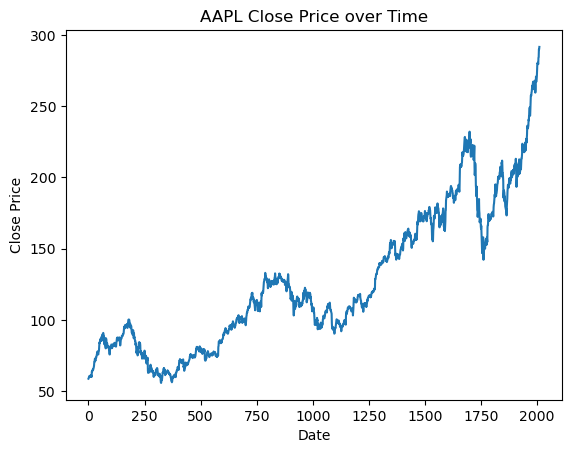

In [23]:
import matplotlib.pyplot as plt

# Plot the Close price over time
plt.plot(data['Close'])
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.title('AAPL Close Price over Time')
plt.show()


In [24]:
data.index = pd.to_datetime(data.Date)


<IPython.core.display.Javascript object>

# Periodic Visualization of the Apple Stock Market Data

We got to see that the data has an upward trend from plotting the line plot against the daily stock prices. Let us check the same line plot plotted after smoothening the data on a weekly, monthly,quaterly and annual basis. 

By doing this, we can determine the seasonality of the data, i.e. is the data varying weekly, monthly or on what time interval. This helps us in model building

## 1. Weekly Smoothening

In [25]:
data

,Date,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,,
2012-01-03,2012-01-03,58.485714,58.928570,58.428570,58.747143,50.765709,75555200
2012-01-04,2012-01-04,58.571430,59.240002,58.468571,59.062859,51.038536,65005500
2012-01-05,2012-01-05,59.278572,59.792858,58.952858,59.718571,51.605175,67817400
2012-01-06,2012-01-06,59.967144,60.392857,59.888573,60.342857,52.144630,79573200
2012-01-09,2012-01-09,60.785713,61.107143,60.192856,60.247143,52.061932,98506100
...,...,...,...,...,...,...,...
2019-12-23,2019-12-23,280.529999,284.250000,280.369995,284.000000,282.054138,24643000
2019-12-24,2019-12-24,284.690002,284.890015,282.920013,284.269989,282.322266,12119700
2019-12-26,2019-12-26,284.820007,289.980011,284.700012,289.910004,287.923645,23280300


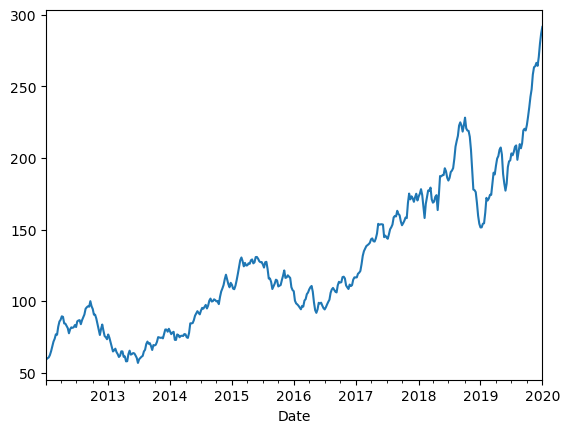

<Figure size 2000x1000 with 0 Axes>

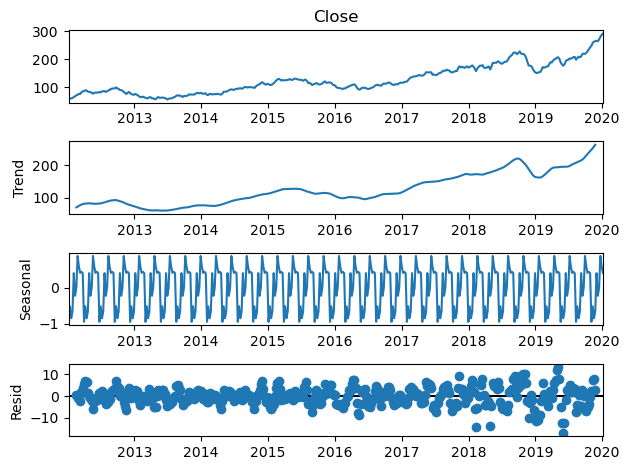

In [26]:

W_data=data.resample('W').mean()
W_data['Close'].plot()

from statsmodels.tsa.seasonal import seasonal_decompose

plt.figure(figsize=(20,10))
decompose_ts_add = seasonal_decompose(W_data.Close,period=12) #period 12 is 
decompose_ts_add.plot()
plt.show()

### From the above decomposition plot , we are getting an exponential trend with additive seasonality

## 2. Monthly Smoothening

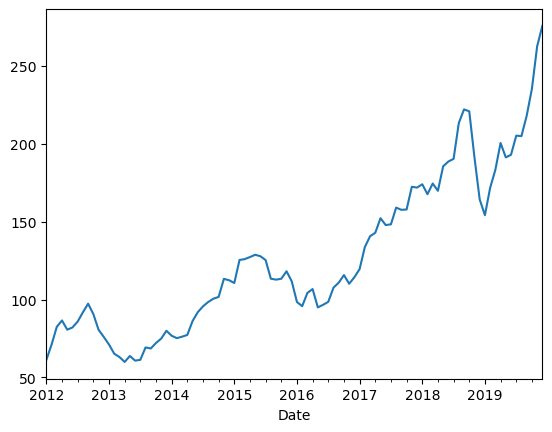

<Figure size 2000x1000 with 0 Axes>

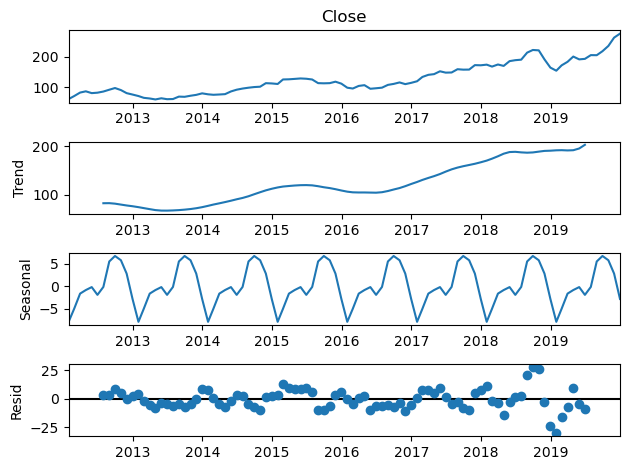

In [27]:
M_data=data.resample('M').mean()
M_data['Close'].plot()

plt.figure(figsize=(20,10))
decompose_ts_add = seasonal_decompose(M_data.Close,period=12) #period 12 is 
decompose_ts_add.plot()
plt.show()

### From the above decomposition plot , we are getting an exponential trend with additive seasonality


## 3. Quaterly Smoothening

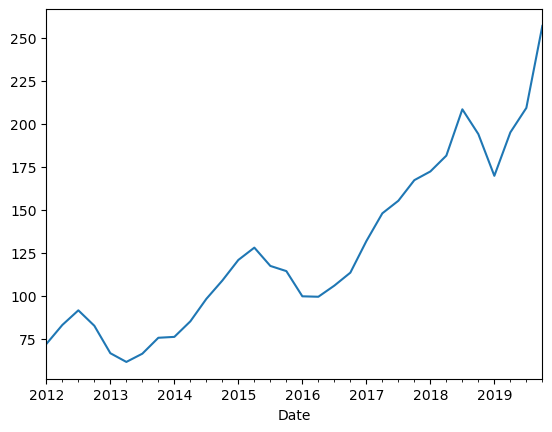

<Figure size 2000x1000 with 0 Axes>

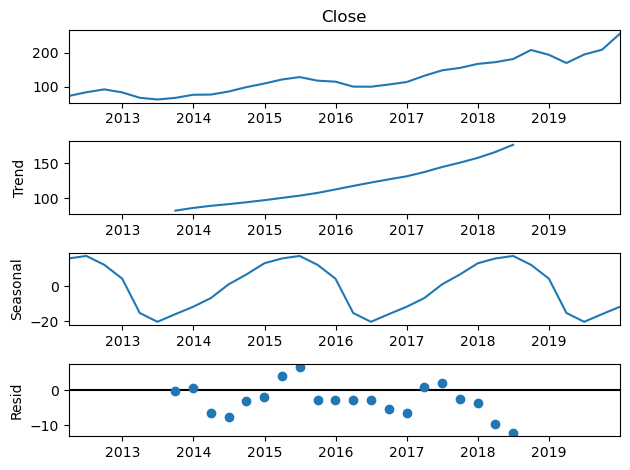

In [28]:
Q_data=data.resample('Q').mean()
Q_data['Close'].plot()

plt.figure(figsize=(20,10))
decompose_ts_add = seasonal_decompose(Q_data.Close,period=12) #period 12 is 
decompose_ts_add.plot()
plt.show()

### From the above decomposition plot , we are getting an exponential trend with additive seasonality


## 4. Annual Smoothening

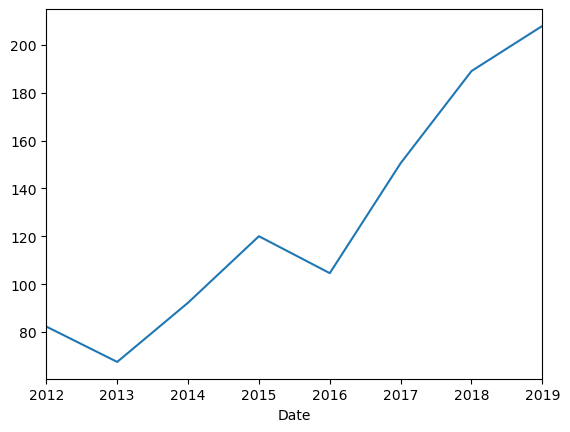

<Figure size 2000x1000 with 0 Axes>

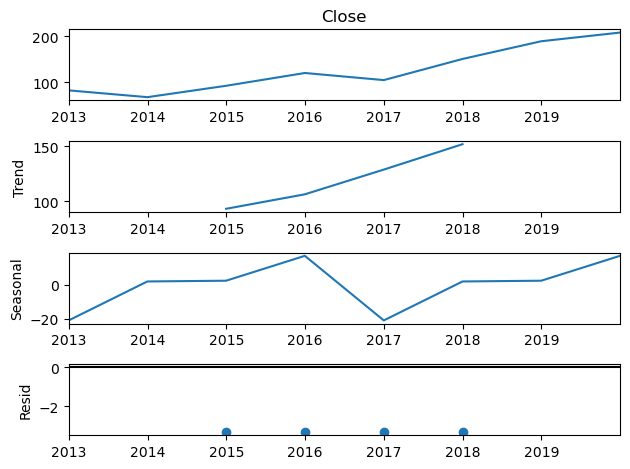

In [29]:
A_data=data.resample('A').mean()
A_data['Close'].plot()

plt.figure(figsize=(20,10))
decompose_ts_add = seasonal_decompose(A_data.Close,period=4) #period 12 is 
decompose_ts_add.plot()
plt.show()

### From the above decomposition plot , we are getting an exponential trend with additive seasonality


### From the above smoothening techniques, we can conclude that our data has an upward exponential trend with Additive Seasonality.
### The presence of seasonality indicates that our data is non-stationery. Forecasting cannot be done on a non stationery data.
### Hence we will have to perform some transformations.

## Statisitical Test for finding out the Stationarity: ADF Test

### Null Hypothesis(Ho)= The data is Non-stationary
### Alternate Hypothesis(Ha)= The data is stationary

In [30]:
from statsmodels.tsa.stattools import adfuller
print("Observations of Dickey-fuller test")
Adf_test = adfuller(data['Close'],autolag='AIC')
Adf_output=pd.Series(Adf_test[0:4],index=['Test Statistic','p-value','#lags used','number of observations used'])

Observations of Dickey-fuller test


<IPython.core.display.Javascript object>

In [31]:
Adf_output

Test Statistic                    1.219370
p-value                           0.996117
#lags used                        9.000000
number of observations used    2001.000000
dtype: float64

### If p-value<0.05, we reject the null hypothesis
### If p-value>0.05, we fail to reject the null hypothesis

### Hence, as our p-value is greater than 0.05, we fail to reject the null hypothesis. We can conclude via ADF test, that our Data is Non-stationary

In [32]:
data=data.set_index('Date')

In [33]:
data.tail(365)

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2018-07-19,189.690002,192.550003,189.690002,191.880005,186.437805,20286800
2018-07-20,191.779999,192.429993,190.169998,191.440002,186.010315,20676200
2018-07-23,190.679993,191.960007,189.559998,191.610001,186.175430,15989400
2018-07-24,192.449997,193.660004,192.050003,193.000000,187.526047,18697900
2018-07-25,193.059998,194.850006,192.429993,194.820007,189.294418,16709900
...,...,...,...,...,...,...
2019-12-23,280.529999,284.250000,280.369995,284.000000,282.054138,24643000
2019-12-24,284.690002,284.890015,282.920013,284.269989,282.322266,12119700
2019-12-26,284.820007,289.980011,284.700012,289.910004,287.923645,23280300


In [34]:
data

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2012-01-03,58.485714,58.928570,58.428570,58.747143,50.765709,75555200
2012-01-04,58.571430,59.240002,58.468571,59.062859,51.038536,65005500
2012-01-05,59.278572,59.792858,58.952858,59.718571,51.605175,67817400
2012-01-06,59.967144,60.392857,59.888573,60.342857,52.144630,79573200
2012-01-09,60.785713,61.107143,60.192856,60.247143,52.061932,98506100
...,...,...,...,...,...,...
2019-12-23,280.529999,284.250000,280.369995,284.000000,282.054138,24643000
2019-12-24,284.690002,284.890015,282.920013,284.269989,282.322266,12119700
2019-12-26,284.820007,289.980011,284.700012,289.910004,287.923645,23280300


In [35]:
# Determine train and test set boundaries
total_data_points = len(data)
test_set_boundary = data.index.max() - pd.DateOffset(years=1)  # Last year of data as test set boundary

# Split data into train and test sets
train_set = data.loc[data.index <= test_set_boundary]
test_set = data.loc[data.index > test_set_boundary]

# Optionally, reset the index if needed


# Check the shapes of train and test sets
print("Train set shape:", train_set.shape)
print("Test set shape:", test_set.shape)


<IPython.core.display.Javascript object>

Train set shape: (1759, 6)
Test set shape: (252, 6)


In [36]:
train_set

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2012-01-03,58.485714,58.928570,58.428570,58.747143,50.765709,75555200
2012-01-04,58.571430,59.240002,58.468571,59.062859,51.038536,65005500
2012-01-05,59.278572,59.792858,58.952858,59.718571,51.605175,67817400
2012-01-06,59.967144,60.392857,59.888573,60.342857,52.144630,79573200
2012-01-09,60.785713,61.107143,60.192856,60.247143,52.061932,98506100
...,...,...,...,...,...,...
2018-12-21,156.860001,158.160004,149.630005,150.729996,147.481339,95744600
2018-12-24,148.149994,151.550003,146.589996,146.830002,143.665421,37169200
2018-12-26,148.300003,157.229996,146.720001,157.169998,153.782547,58582500


In [37]:
train_set

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2012-01-03,58.485714,58.928570,58.428570,58.747143,50.765709,75555200
2012-01-04,58.571430,59.240002,58.468571,59.062859,51.038536,65005500
2012-01-05,59.278572,59.792858,58.952858,59.718571,51.605175,67817400
2012-01-06,59.967144,60.392857,59.888573,60.342857,52.144630,79573200
2012-01-09,60.785713,61.107143,60.192856,60.247143,52.061932,98506100
...,...,...,...,...,...,...
2018-12-21,156.860001,158.160004,149.630005,150.729996,147.481339,95744600
2018-12-24,148.149994,151.550003,146.589996,146.830002,143.665421,37169200
2018-12-26,148.300003,157.229996,146.720001,157.169998,153.782547,58582500


## Log transformation and Differencing for train and test dataset

<IPython.core.display.Javascript object>

<AxesSubplot:xlabel='Date'>

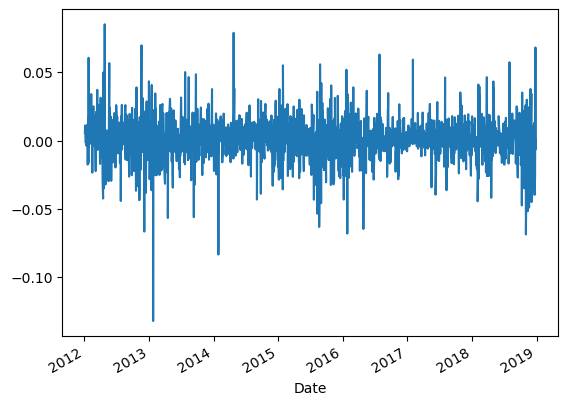

In [38]:

data_log_tr= np.log(train_set['Close'])
data_log_diff_tr=data_log_tr- data_log_tr.shift()
data_log_diff_tr.dropna().plot()

<IPython.core.display.Javascript object>

<AxesSubplot:xlabel='Date'>

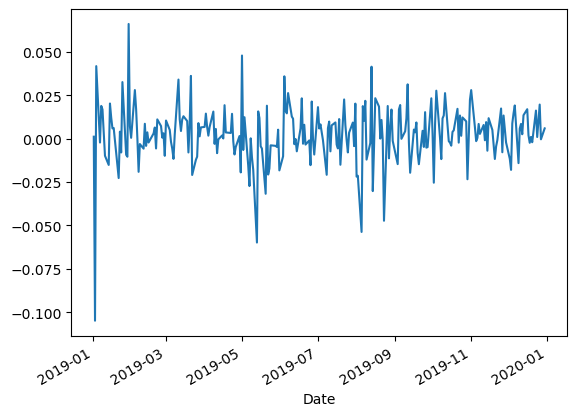

In [39]:

data_log_te= np.log(test_set['Close'])
data_log_diff_te=data_log_te- data_log_te.shift()
data_log_diff_te.dropna().plot()

In [40]:
data_transformed=data_log_diff_tr.dropna()

## ADF testing for checking the stationarity after transformation

In [41]:
result=adfuller (data_transformed)
print('Test Statistic: %f' %result[0])
print('p-value: %f' %result[1])
print('Critical values:')
for key, value in result[4].items ():
     print('\t%s: %.3f' %(key, value))

Test Statistic: -14.937510
p-value: 0.000000
Critical values:
	1%: -3.434
	5%: -2.863
	10%: -2.568


In [42]:
data_transformed

Date
2012-01-04    0.005360
2012-01-05    0.011041
2012-01-06    0.010400
2012-01-09   -0.001587
2012-01-10    0.003574
                ...   
2018-12-21   -0.039672
2018-12-24   -0.026215
2018-12-26    0.068053
2018-12-27   -0.006511
2018-12-28    0.000512
Name: Close, Length: 1758, dtype: float64

## ACF and PACF
ACF and PACF plots are used to understand the correaltion of the series with it's own lags

### ACF
1. ACF is the correlation of observation of current time spot and a previous time spot. For eg. T vs T-1 or T vs T-2. 
2. It gives the correaltion of any series with it's lagged values
3. To figure out the order of an MA model, you would use the ACF.


### PACF
1. PACF explains the partial correlation between the series and a particular lag only i.e. the infleunce of a lag on the current observation after eliminating the influence of other lags.
2. To figure out the order of an AR model, you would use the PACF.




## Significance of ACF and PACF plots
1. We find optimum features or order of the MA process using the ACF plot.
2. As ACF takes into consideration all the lagged values in the time series, there can be several spikes above the confidence interval which may give rise to the problem of multi-collinearity. So to avoid that we bring in the PACF plot.
3. PACF plot removes variations explained by earlier lags so we get only the relevant features. This removes the noise and it helps in avoiding the multicollinearity problem.

## ACF and PACF plots for Apple Stock Prices Dataset

## Significance of ACF and PACF plots
1. We find optimum features or order of the MA process using the ACF plot.
2. As ACF takes into consideration all the lagged values in the time series, there can be several spikes above the confidence interval which may give rise to the problem of multi-collinearity. So to avoid that we bring in the PACF plot.
3. PACF plot removes variations explained by earlier lags so we get only the relevant features. This removes the noise and it helps in avoiding the multicollinearity problem.

## Interpretting the ACF and PACF plots.
We need to interprete the ACF and PACF plots in order to find out the order for the model that we will be building

## Let's look at our options:
### 1. AR: 
An Auto Regressive (AR) model is one where Yt depends only on its own lags.
### 2. MA:
A Moving Average (MA) model is one where Yt depends only on the lagged forecast errors.
### 3. ARIMA
An ARIMA model is one where the time series was differenced at least once to make it stationary and we combine the AR and the MA terms.
### We will be choosing ARIMA for the Apple Stock Prices Forecast




## Why Arima
ARIMA models are widely used for real life time series analysis since most times series data are non stationary and need differencing. As we have already seen from above, our data is non-stationary and we have done differencing once to make it stationary. Hence, we will be using ARIMA model

## ARIMA Terminologies
p,d,q help in finding out the order of ARIMA model that we will be using while fitting the data
1. p: Number of autoregressive terms, 
2. d: Number of nonseasonal differences needed for stationarity, 
3. q: Number of lagged forecast errors in the prediction equation

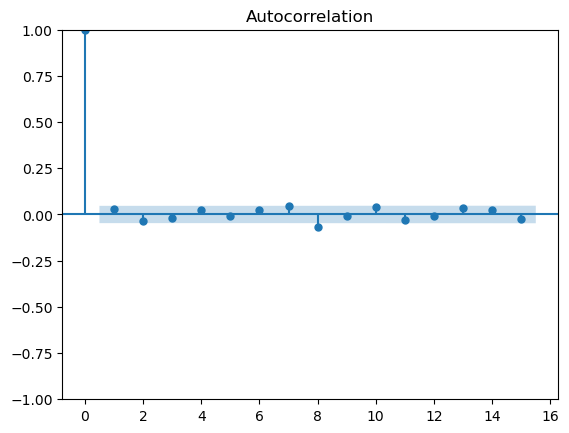

In [43]:
import statsmodels.graphics.tsaplots as tsa_plots
tsa_plots.plot_acf(data_log_diff_tr.dropna(),lags=15)
#tsa_plots.plot_pacf(data.Close,lags=20)
plt.show()

#### This is the ACF plot for the transformed data. As we can see the firsy line is crossing and coming out of the confidence interval. Thus only the lag of 1 days is relevant and hence the order is 1. That is, q=1

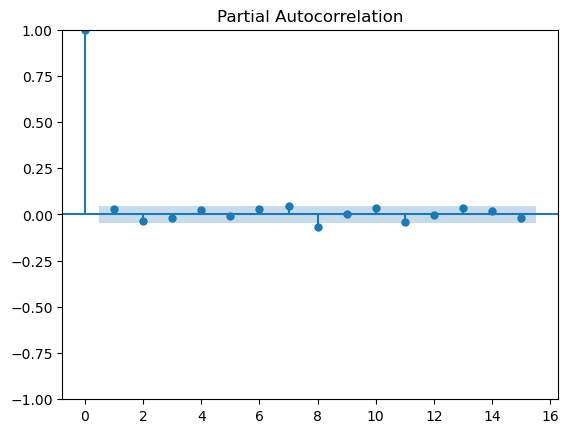

In [44]:
tsa_plots.plot_pacf(data_log_diff_tr.dropna(),lags=15)
plt.show()

#### This is the PACF plot for the transformed data. As we can see the first line is crossing and coming out of the confidence interval. Thus only till lag 1 we have to consider and hence the order is 1. That is, p=1

#### As we have done the differencing only once, d=1

## Model Building
## Method: ARIMA

In [45]:
from statsmodels.tsa.arima_model import ARIMA
from statsmodels.tsa.arima.model import ARIMA


## ARIMA Model for trained dataset for daily stock prices

From the PACF and ACF plots shown above, we should take p,d,q as 1,1,1 respectively. But we are also trying to do some variations in the values of p and q to get a better and more accurate result.

We will be comparing the p-values of AR,MA and sigma models along with the AIC and BIC values

In [46]:
train_set.drop(['Open','High','Low','Adj Close','Volume'], inplace=True, axis=1)

In [47]:
test_set.drop(['Open','High','Low','Adj Close','Volume'], inplace=True, axis=1)

## Model 1, Order (1,1,1)

In [48]:
model=ARIMA(train_set,order=(1,1,1))

C:\Users\apurv\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\apurv\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\apurv\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


In [49]:
model_fit=model.fit()

In [50]:
model_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                  Close   No. Observations:                 1759
Model:                 ARIMA(1, 1, 1)   Log Likelihood               -3638.019
Date:                Fri, 12 May 2023   AIC                           7282.037
Time:                        11:57:16   BIC                           7298.453
Sample:                             0   HQIC                          7288.104
                               - 1759                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.8095      0.115     -7.039      0.000      -1.035      -0.584
ma.L1          0.8365      0.107      7.817      0.000       0.627       1.046
sigma2         3.6727      0.062     59.620      0.000       3.552       3.793
===================================================================================
Ljung-Box (L1) (Q):                   0.05   Jarque-Bera (JB):              3063.76
Prob(Q):                              0.82   Prob(JB):                         0.00
Heteroskedasticity (H):               3.41   Skew:                            -0.39
Prob(H) (two-sided):                  0.00   Kurtosis:                         9.42
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [51]:
model_fit.fittedvalues

Date
2012-01-03      0.000000
2012-01-04     58.747148
2012-01-05     59.070834
2012-01-06     59.728832
2012-01-09     60.350626
                 ...    
2018-12-21    156.875207
2018-12-24    150.527206
2018-12-26    146.894170
2018-12-27    157.395963
2018-12-28    155.933377
Length: 1759, dtype: float64

In [52]:
train_set

,Close
Date,
2012-01-03,58.747143
2012-01-04,59.062859
2012-01-05,59.718571
2012-01-06,60.342857
2012-01-09,60.247143
...,...
2018-12-21,150.729996
2018-12-24,146.830002
2018-12-26,157.169998


In [53]:
len(train_set)

1759

In [54]:
len(test_set)

252

In [55]:
predicted = model_fit.predict(start=len(train_set), end=len(train_set)+len(test_set)-1, type='levels')
predicted.index=test_set.index


C:\Users\apurv\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


In [56]:
predicted

Date
2018-12-31    156.413370
2019-01-02    156.264928
2019-01-03    156.385092
2019-01-04    156.287819
2019-01-07    156.366562
                 ...    
2019-12-23    156.331335
2019-12-24    156.331335
2019-12-26    156.331335
2019-12-27    156.331335
2019-12-30    156.331335
Name: predicted_mean, Length: 252, dtype: float64

In [57]:
rmse = np.sqrt(np.mean((predicted - test_set['Close'].values)**2))

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [58]:
rmse

61.72162080269745

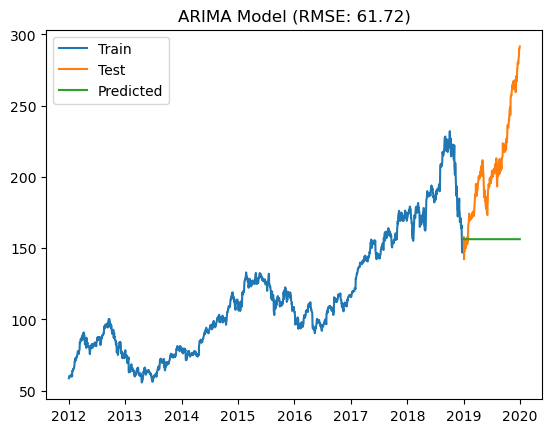

In [59]:
plt.plot(train_set['Close'], label='Train')
plt.plot(test_set['Close'], label='Test')
plt.plot(test_set.index, predicted, label='Predicted')
plt.title(f'ARIMA Model (RMSE: {rmse:.2f})')
plt.legend()
plt.show()

 As we can se from the above plot, we are getting a constant straight line for the predicted values. This is due to the presence of seasonality. To overcome this we will have to use the Seasonal ARIMA (SARIMAX) model. Hence we will not be considering ARIMA Model

## Model 2: SARIMAX

In [60]:
import statsmodels.api as sm

In [61]:
model_sarima = sm.tsa.SARIMAX(train_set['Close'], order=(2,1,0), seasonal_order=(1,1,1,10))
result_sarima = model_sarima.fit()
result_sarima.summary()

C:\Users\apurv\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\apurv\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                      
==========================================================================================
Dep. Variable:                              Close   No. Observations:                 1759
Model:             SARIMAX(2, 1, 2)x(2, 1, 2, 10)   Log Likelihood               -3631.234
Date:                            Fri, 12 May 2023   AIC                           7280.469
Time:                                    11:57:27   BIC                           7329.665
Sample:                                         0   HQIC                          7298.656
                                           - 1759                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.7858      0.005   -158.397      0.000      -0.796      -0.776
ar.L2         -0.9924      0.005   -206.285      0.000      -1.002      -0.983
ma.L1          0.8026      0.006    144.099      0.000       0.792       0.814
ma.L2          0.9924      0.005    181.992      0.000       0.982       1.003
ar.S.L10      -0.9589      0.168     -5.701      0.000      -1.289      -0.629
ar.S.L20       0.0372      0.018      2.046      0.041       0.002       0.073
ma.S.L10      -0.0041     24.541     -0.000      1.000     -48.103      48.095
ma.S.L20      -0.9959     24.429     -0.041      0.967     -48.877      46.885
sigma2         3.6218     88.841      0.041      0.967    -170.504     177.748
===================================================================================
Ljung-Box (L1) (Q):                   0.70   Jarque-Bera (JB):              2609.06
Prob(Q):                              0.40   Prob(JB):                         0.00
Heteroskedasticity (H):               3.49   Skew:                            -0.36
Prob(H) (two-sided):                  0.00   Kurtosis:                         8.94
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

#### We changed the normal order from (1,1,1) to (1,1,0) as the p-values for former were not under 0.05. We have kept the seasonal order as quarterly as we are getting the best RMSE value for the same.

In [62]:
predict_sarima = result_sarima.predict(start=len(train_set['Close']), end=len(train_set['Close'])+len(test_set['Close'])-1)
predict_sarima.index=test_set.index


C:\Users\apurv\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


In [63]:
rmse = np.sqrt(np.mean((predict_sarima - test_set['Close'].values)**2))

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [64]:
rmse

54.68047479513258

In [65]:
predict_sarima

Date
2018-12-31    155.552008
2019-01-02    156.323263
2019-01-03    156.179136
2019-01-04    155.120786
2019-01-07    155.794190
                 ...    
2019-12-23    169.085671
2019-12-24    168.920827
2019-12-26    169.579825
2019-12-27    169.453605
2019-12-30    169.108914
Name: predicted_mean, Length: 252, dtype: float64

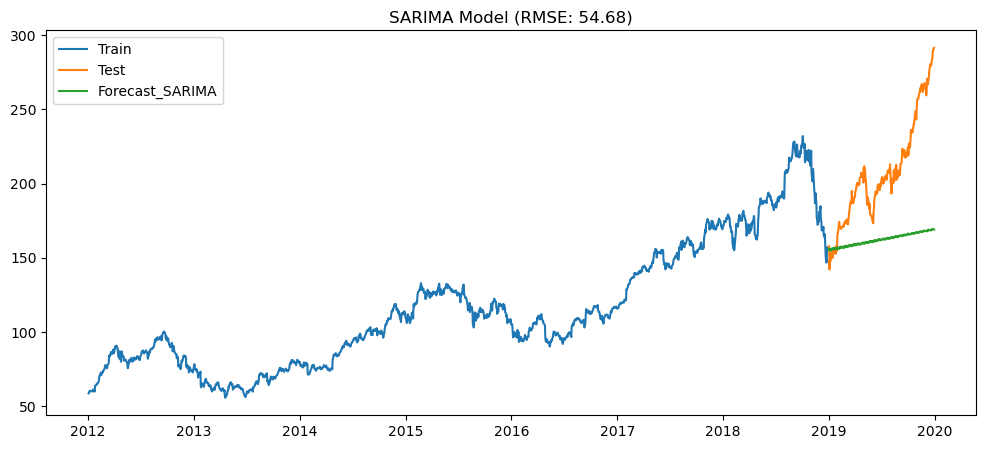

In [66]:
plt.figure(figsize=(12,5))
plt.plot(train_set['Close'], label='Train')
plt.plot(test_set['Close'], label='Test')
plt.plot(predict_sarima, label='Forecast_SARIMA')
plt.title(f'SARIMA Model (RMSE: {rmse:.2f})')
plt.legend()
plt.show()

## Forecast for next 30 Days

In [67]:
future_dates = pd.date_range(start=test_set['Close'].index[-1], periods=31, freq='D')


<IPython.core.display.Javascript object>

In [68]:
forecast_30 = result_sarima.predict(start=len(train_set['Close'])+len(test_set['Close']), end=len(train_set['Close'])+len(test_set['Close'])+30, dynamic=True)

C:\Users\apurv\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
C:\Users\apurv\anaconda3\lib\site-packages\statsmodels\tsa\statespace\kalman_filter.py:2290: ValueWarning: Dynamic prediction specified to begin during out-of-sample forecasting period, and so has no effect.
  warn('Dynamic prediction specified to begin during'


In [69]:
future_dates = pd.date_range(start=test_set['Close'].index[-1], periods=31, freq='D')


<IPython.core.display.Javascript object>

In [70]:
forecast_30.index = future_dates


In [71]:
forecast_30

2019-12-30    169.467533
2019-12-31    169.307671
2020-01-01    169.004597
2020-01-02    169.153956
2020-01-03    169.542479
2020-01-04    169.473468
2020-01-05    169.636890
2020-01-06    170.195204
2020-01-07    169.850881
2020-01-08    169.791601
2020-01-09    170.136390
2020-01-10    169.698318
2020-01-11    169.621573
2020-01-12    169.889721
2020-01-13    169.965688
2020-01-14    170.006009
2020-01-15    170.343678
2020-01-16    170.609735
2020-01-17    170.293698
2020-01-18    170.488171
2020-01-19    170.611472
2020-01-20    170.101433
2020-01-21    170.307031
2020-01-22    170.404273
2020-01-23    170.328962
2020-01-24    170.676081
2020-01-25    170.972634
2020-01-26    171.013193
2020-01-27    170.943491
2020-01-28    171.182183
2020-01-29    171.020316
Freq: D, Name: predicted_mean, dtype: float64

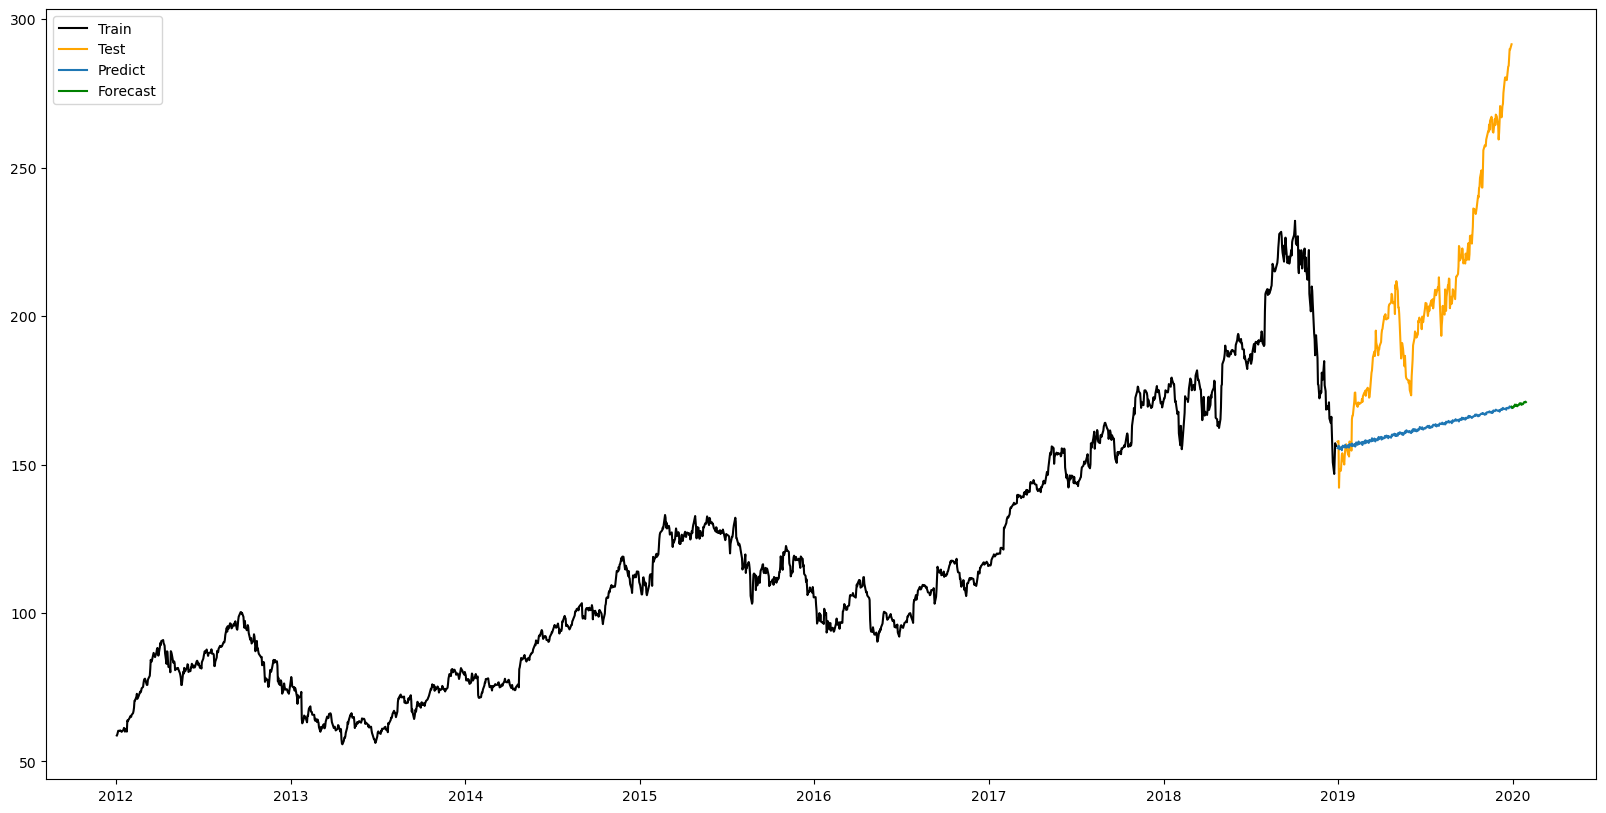

In [72]:
# Plot the predicted values
plt.figure(figsize=(20,10))
plt.plot(train_set.index, train_set["Close"], label='Train',color="black")
plt.plot(test_set.index, test_set["Close"], label='Test',color="orange")
plt.plot(predict_sarima, label='Predict')

plt.plot(forecast_30, label='Forecast',color="Green")
plt.legend()
plt.show()

import pickle
filename = 'finalfitmodel3.pkl'
pickle.dump(result_sarima, open(filename, 'wb'))